In [17]:
import pandas as pd

<!DOCTYPE html>
<html>
<h1> 
    Conduct Data Checks
</h1>
<p>Read in <em>soil_measures.csv</em> as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.</p>
</html>

In [18]:
df = pd.read_csv('soil_measures.csv')

In [19]:
df.head()
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [20]:
# Get total number of crops

crop_num = df["crop"].count()
print(crop_num)

2200


In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [22]:
# Check if data in each potential feature column is numeric
df.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

<!DOCTYPE html>
<html>
<h1> 
    Handling Cartegories
</h1>
<p>Convert the <em>crop</em> column to a categorical data type and verify that the conversion was successful.</p>

In [23]:
# Import dummies
df['crop'] = df['crop'].astype('category')
df.dtypes

N          int64
P          int64
K          int64
ph       float64
crop    category
dtype: object

<!DOCTYPE html>
<html>
<h1> 
    Split our data into training and testing sets
</h1>
<p>Split the data into training and testing sets using a 80/20 split. Use the <em>random_state = 42</em> parameter to ensure reproducibility, with X as our features columns and y as our target column</p>

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('crop', axis=1).values
y = df['crop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<!DOCTYPE html>
<html>
<h1> 
    Predict the "crop" type using each feature individually
</h1>
<p> looping over all the features, and, for each feature, fit a Logistic Regression model and calculate f1_score(). When creating the model, set max_iter to 2000 so the model can converge, and pass an appropriate string value to the multi_class keyword argument. </p>
  

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
# Get the feature names
features = df.columns[:-1]

# instantiate the model
model = LogisticRegression(max_iter=2000, multi_class='multinomial')

# Loop over all the features
num_features = X_train.shape[1]
for i in range(num_features):
    model.fit(X_train[:, i].reshape(-1, 1), y_train)
    score = f1_score(y_test, model.predict(X_test[:, i].reshape(-1, 1)), average="weighted")
    print(f'Feature: {features[i]}, f1_score: {score}')

Feature: N, f1_score: 0.10507916708090527
Feature: P, f1_score: 0.22243217563095563
Feature: K, f1_score: 0.0458225366614312


<!DOCTYPE html>
<html>
<h1> 
    Optimizing model performance
</h1>
<p> In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity </p>

In [26]:
correlation = df.drop('crop', axis=1).corr()
print(correlation)

           N         P         K        ph
N   1.000000 -0.231460 -0.140512  0.096683
P  -0.231460  1.000000  0.736232 -0.138019
K  -0.140512  0.736232  1.000000 -0.169503
ph  0.096683 -0.138019 -0.169503  1.000000


<Axes: >

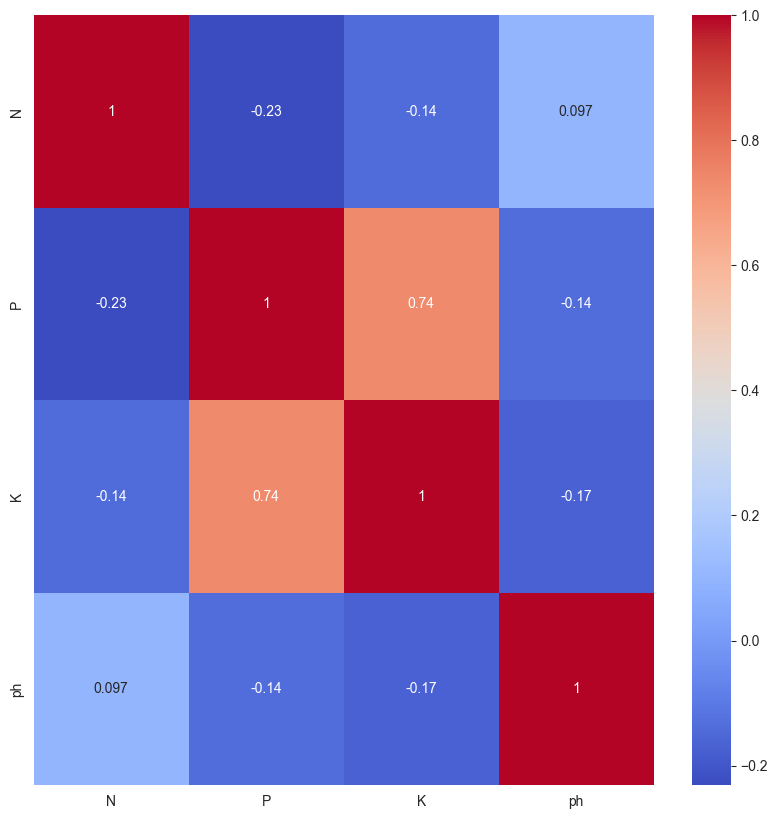

In [27]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')



In [32]:
import warnings
warnings.filterwarnings('ignore')
X = df.drop(['crop', 'P'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

model_performance = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {model_performance}')

F1 score: 0.5908387430767142
